<a href="https://colab.research.google.com/github/livingorganism/Coffee-Quality-Prediction/blob/main/Coffee_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Regression Neural Network to predict coffee quality

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='drive/My Drive'

In [ ]:
import pandas as pd

df_arabica_clean = pd.read_csv(path + '/df_arabica_clean.csv')


In [ ]:
df_arabica_clean

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


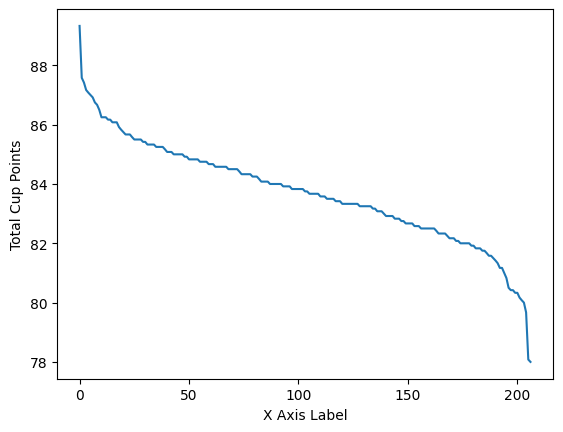

In [ ]:
import matplotlib.pyplot as plt
df_arabica_clean['Total Cup Points'].plot()

# Add labels to the x and y axes
plt.xlabel('X Axis Label')
plt.ylabel('Total Cup Points')

# Show the plot
plt.show()


In [ ]:
print(df_arabica_clean['Total Cup Points'].values)


[89.33 87.58 87.42 87.17 87.08 87.   86.92 86.75 86.67 86.5  86.25 86.25
 86.25 86.17 86.17 86.08 86.08 86.08 85.92 85.83 85.75 85.67 85.67 85.67
 85.58 85.5  85.5  85.5  85.5  85.42 85.42 85.33 85.33 85.33 85.33 85.25
 85.25 85.25 85.25 85.17 85.08 85.08 85.08 85.   85.   85.   85.   85.
 84.92 84.92 84.83 84.83 84.83 84.83 84.83 84.75 84.75 84.75 84.75 84.67
 84.67 84.67 84.58 84.58 84.58 84.58 84.58 84.58 84.5  84.5  84.5  84.5
 84.5  84.42 84.33 84.33 84.33 84.33 84.33 84.25 84.25 84.25 84.17 84.08
 84.08 84.08 84.08 84.   84.   84.   84.   84.   84.   83.92 83.92 83.92
 83.92 83.83 83.83 83.83 83.83 83.83 83.83 83.75 83.75 83.67 83.67 83.67
 83.67 83.67 83.58 83.58 83.58 83.5  83.5  83.5  83.5  83.42 83.42 83.42
 83.33 83.33 83.33 83.33 83.33 83.33 83.33 83.33 83.25 83.25 83.25 83.25
 83.25 83.25 83.17 83.17 83.08 83.08 83.08 83.   82.92 82.92 82.92 82.92
 82.83 82.83 82.83 82.75 82.75 82.67 82.67 82.67 82.67 82.58 82.58 82.58
 82.5  82.5  82.5  82.5  82.5  82.5  82.5  82.42 82.33

In [ ]:

print(df_arabica_clean.columns)


Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = df_arabica_clean.drop('Total Cup Points', axis=1)
y = df_arabica_clean['Total Cup Points']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the target variable
scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

# Print the shapes of the training and testing sets
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (144, 40)
y_train shape: (144, 1)
X_test shape: (63, 40)
y_test shape: (63, 1)


In [ ]:
print(df_arabica_clean['Aroma'].values)

[8.58 8.5  8.33 8.08 8.33 8.33 8.33 8.25 8.08 8.08 8.08 8.08 8.08 7.67
 8.08 8.17 8.17 8.   8.08 8.17 8.   8.08 7.67 8.08 7.83 7.83 7.92 8.17
 8.   8.   8.   7.92 8.08 7.67 8.   7.92 8.   8.25 8.17 7.75 8.   8.
 8.   8.   7.92 8.17 7.67 7.67 7.83 7.92 8.   7.83 8.   7.92 7.83 7.67
 7.83 7.83 7.92 7.67 7.83 7.58 7.83 8.17 7.92 8.08 7.83 8.   7.75 7.75
 7.83 7.92 8.08 7.83 7.67 7.92 7.83 7.83 7.75 7.67 7.58 7.92 7.75 7.58
 7.83 7.92 7.67 7.67 7.75 7.58 8.   7.75 7.67 7.67 7.83 7.58 7.75 7.67
 7.58 7.58 7.83 7.92 7.67 7.67 7.67 7.83 7.67 7.83 7.58 7.67 7.58 7.58
 7.58 7.75 7.75 7.42 7.42 7.67 7.75 7.75 7.75 7.58 7.5  7.58 7.67 7.58
 7.75 7.92 7.92 7.58 7.75 7.67 7.67 7.75 7.75 7.67 7.67 7.67 7.75 8.
 7.5  7.75 7.58 7.67 7.67 7.17 7.58 7.33 7.33 7.58 7.33 7.5  7.67 7.67
 7.67 7.5  7.67 7.75 7.5  7.33 7.67 7.58 7.42 7.58 7.5  7.5  7.33 7.67
 7.67 7.75 7.5  7.67 7.5  7.33 7.5  7.17 7.42 7.42 7.67 7.5  7.33 7.25
 7.5  7.5  7.42 7.33 7.58 7.33 7.42 7.33 7.33 7.42 7.25 7.42 7.42 7.42
 7.25 7.42

In [ ]:
print(df_arabica_clean['Flavor'].values)

[8.5  8.5  8.42 8.17 8.33 8.33 8.17 8.25 8.08 8.17 8.25 8.   8.   8.17
 8.   8.08 8.08 8.17 8.17 8.   7.92 8.   8.   8.   8.   8.08 7.92 8.08
 8.   7.92 8.   8.   8.17 7.83 8.08 7.75 7.92 8.08 7.75 7.92 7.92 8.08
 7.92 7.92 8.   8.08 8.08 8.   7.92 7.92 8.   7.92 8.   7.75 7.83 7.92
 7.92 7.83 8.08 8.   8.   7.83 7.83 7.83 7.75 7.83 8.   7.83 7.83 7.92
 7.92 7.83 7.92 8.   7.83 7.83 7.75 7.83 7.75 7.67 7.92 7.92 7.75 7.92
 7.92 7.75 7.83 7.92 7.75 7.67 7.75 7.58 7.83 7.92 7.83 7.83 7.67 7.75
 7.83 7.92 7.67 7.75 7.92 7.92 7.67 7.75 7.67 7.83 7.75 7.67 7.67 7.75
 7.83 7.67 7.75 7.83 7.42 7.67 7.75 7.92 7.67 7.67 7.75 7.67 7.67 7.75
 7.83 7.92 7.67 7.5  7.75 7.67 7.75 7.58 7.75 7.67 7.75 7.67 7.58 7.67
 7.67 7.5  7.5  7.5  7.58 7.92 7.42 7.58 7.5  7.67 7.58 7.58 7.58 7.67
 7.58 7.58 7.33 7.67 7.58 7.58 7.42 7.58 7.42 7.58 7.5  7.5  7.67 7.58
 7.5  7.42 7.5  7.5  7.67 7.42 7.58 7.5  7.42 7.42 7.33 7.5  7.42 7.42
 7.5  7.5  7.5  7.5  7.42 7.42 7.5  7.5  7.42 7.25 7.25 7.25 7.42 7.33
 7.25 

In [ ]:
print(df_arabica_clean['Acidity'].values)

[8.58 8.   8.17 8.25 8.25 7.83 8.   8.   8.08 8.17 8.08 7.75 8.08 8.33
 7.92 7.92 8.17 7.92 7.92 7.92 7.92 7.92 8.   8.17 8.   7.92 7.92 8.
 7.92 7.83 7.83 7.92 7.83 8.   8.   8.17 7.92 7.75 7.58 8.   7.92 7.75
 8.   7.75 8.   7.67 8.   7.92 8.   7.83 7.75 7.83 7.83 7.92 7.67 7.83
 7.92 7.92 7.92 7.83 7.83 7.67 7.75 7.83 7.67 7.67 7.75 7.67 7.83 7.75
 7.75 7.92 7.83 7.75 7.75 7.92 7.92 7.83 7.75 7.83 7.75 7.75 7.83 7.83
 7.58 7.75 7.83 7.75 7.67 7.75 7.67 7.92 7.92 7.75 7.67 7.75 7.75 7.75
 7.67 7.67 7.92 7.58 7.58 7.58 7.67 7.58 7.75 7.58 7.83 7.75 7.75 7.75
 7.67 7.58 7.58 7.67 8.   7.67 7.5  7.92 7.5  7.75 7.75 7.75 7.75 7.67
 7.58 7.33 7.5  7.83 7.67 7.67 7.58 7.58 7.75 7.58 7.67 7.58 7.58 7.58
 7.58 7.67 7.67 7.75 7.5  7.5  7.5  7.33 7.92 7.5  7.5  7.42 7.5  7.42
 7.42 7.58 7.67 7.67 7.5  7.5  7.5  7.5  7.42 7.42 7.5  7.42 7.67 7.5
 7.58 7.5  7.5  7.5  7.5  7.5  7.42 7.42 7.33 7.33 7.67 7.5  7.42 7.5
 7.42 7.33 7.33 7.42 7.25 7.42 7.33 7.33 7.33 7.42 7.25 7.42 7.25 7.5
 7.33 7.08 

In [ ]:
print(df_arabica_clean['Aftertaste'].values)

[8.42 7.92 8.08 8.17 8.08 8.25 8.08 8.17 8.25 8.08 8.   8.   8.08 8.
 8.08 8.   7.92 8.   7.75 7.92 8.08 7.92 7.83 7.83 7.92 7.83 8.   7.92
 8.   8.   7.83 7.83 7.67 7.83 8.   7.83 7.83 7.83 7.83 7.75 7.83 7.67
 7.67 7.75 7.92 7.83 7.67 7.75 7.75 7.83 7.75 7.75 7.83 7.75 7.67 7.92
 7.75 7.75 7.67 7.67 7.67 7.5  7.75 7.67 7.67 7.67 7.67 7.75 7.67 7.83
 7.75 7.75 7.75 7.5  7.75 7.75 7.58 7.83 7.75 7.83 7.67 7.58 7.58 7.58
 7.83 7.67 7.67 7.67 7.75 7.75 7.5  7.58 7.58 7.58 7.58 7.58 7.58 7.67
 7.67 7.5  7.5  7.42 7.58 7.67 7.58 7.5  7.75 7.67 7.67 7.58 7.5  7.58
 7.58 7.58 7.5  7.58 7.42 7.5  7.5  7.67 7.58 7.5  7.58 7.58 7.42 7.42
 7.58 7.75 7.42 7.5  7.58 7.58 7.67 7.58 7.5  7.5  7.33 7.5  7.58 7.42
 7.58 7.42 7.5  7.42 7.5  7.58 7.58 7.25 7.25 7.58 7.58 7.5  7.33 7.42
 7.42 7.42 7.17 7.17 7.5  7.5  7.5  7.33 7.58 7.42 7.33 7.42 7.25 7.42
 7.33 7.33 7.42 7.25 7.33 7.42 7.42 7.42 7.42 7.42 7.25 7.33 7.33 7.42
 7.25 7.42 7.58 7.33 7.25 7.25 7.33 7.42 7.25 7.33 7.42 7.25 7.25 7.33
 7.17 7.

In [ ]:
print(df_arabica_clean['Sweetness'].values)

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_arabica_clean['Total Cup Points'] = scaler.fit_transform(df_arabica_clean['Total Cup Points'].values.reshape(-1, 1))

print(df_arabica_clean['Total Cup Points'].values)


[1.         0.84554281 0.83142101 0.80935569 0.80141218 0.79435128
 0.78729038 0.77228597 0.76522507 0.75022065 0.72815534 0.72815534
 0.72815534 0.72109444 0.72109444 0.71315093 0.71315093 0.71315093
 0.69902913 0.69108561 0.68402471 0.67696381 0.67696381 0.67696381
 0.6690203  0.6619594  0.6619594  0.6619594  0.6619594  0.6548985
 0.6548985  0.64695499 0.64695499 0.64695499 0.64695499 0.63989409
 0.63989409 0.63989409 0.63989409 0.63283319 0.62488967 0.62488967
 0.62488967 0.61782877 0.61782877 0.61782877 0.61782877 0.61782877
 0.61076787 0.61076787 0.60282436 0.60282436 0.60282436 0.60282436
 0.60282436 0.59576346 0.59576346 0.59576346 0.59576346 0.58870256
 0.58870256 0.58870256 0.58075905 0.58075905 0.58075905 0.58075905
 0.58075905 0.58075905 0.57369815 0.57369815 0.57369815 0.57369815
 0.57369815 0.56663725 0.55869373 0.55869373 0.55869373 0.55869373
 0.55869373 0.55163283 0.55163283 0.55163283 0.54457193 0.53662842
 0.53662842 0.53662842 0.53662842 0.52956752 0.52956752 0.52956

In [ ]:
X_train

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Defects,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
146,146,146,Vietnam,Ea tan Cooperative,VHA- S3,SIMEXCO DAKLAK LTD,NaN,SIMEXCO DAKLAK LTD,900,"Eatan Commune, Krong Nang District, Krong Nang...",...,0.0,13.3,0,0,green,4,"June 3rd, 2023",Specialty Coffee Association,*CURRENTLY NOT ACCEPTING SAMPLES**,Brit Amell (CQI) - bamell@coffeeinstitute.org -
108,108,108,Taiwan,恆珊農場,A05-Northern Taiwan Specialty Coffee Evaluation,恆珊農場,NaN,Taiwu Coffee Cooperative,200-400,新竹縣,...,0.0,9.2,0,0,greenish,0,"January 6th, 2024",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
176,176,176,Costa Rica,San Diego Mill,S019194 - P04178,Dosmil,5-0015-0228,Beneficios Volcafé Costa Rica,1500,Corralillo Tarrazu,...,0.0,10.5,1,2,green,8,"March 28th, 2024",Specialty Coffee Association of Costa Rica,"Blvd Rohrmoser, de Prisma Dental 200 norte y 2...",Noelia Villalobos - (506) 2220 0685
31,31,31,Taiwan,鄉庭有機農場Siang-Ting Organic Farm,2022/02,鄉庭有機農場Siang-Ting Organic Farm,NaN,Taiwan Coffee Laboratory,150-250,壽豐鄉Shoufeng Township,...,0.0,10.8,0,0,green,0,"December 12th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
12,12,12,Taiwan,古峰咖啡莊園 Goodfun Coffee Farm,"The 2022 Pacific Rim Coffee Summit,T051",古峰咖啡莊園,NaN,Taiwan Coffee Laboratory,1250,Yunlin,...,0.0,11.9,0,0,green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,106,106,Taiwan,永舜咖啡莊園,202203,yes,non,Yongshun,1250,"Caoling , Gukeng Township, Yunlin County",...,0.0,10.0,0,0,bluish-green,0,"October 24th, 2023",Blossom Valley International宸嶧國際,No.72 Mo-Fan St. Taiwan Zip: 403,Damon Chen陳嘉峻 - +886423022323
14,14,14,Colombia,La Gaitania,"The 2022 Pacific Rim Coffee Summit,CO03",La Gaitania,NaN,Taiwan Coffee Laboratory,1850,tolima,...,0.0,10.6,0,0,green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
92,92,92,Colombia,COO,3-002-00883,Laumayer Armenia,NaN,InterAmerican Coffee,1400-1700,Huila,...,0.0,13.3,0,2,green,3,"July 27th, 2023",NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Tirza Odermatt - +41 41 728 72 81
179,179,179,Peru,Fundo La Libertad,301R,Planta Callao,301R,Itochu Corporation,1600,"Chanchamayo, La Merced",...,0.0,11.6,0,2,greenish,2,"July 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [ ]:
y_train

array([[0.42630185],
       [0.50044131],
       [0.35304501],
       [0.64695499],
       [0.72815534],
       [0.63989409],
       [0.6619594 ],
       [0.62488967],
       [0.55163283],
       [0.51456311],
       [0.43424537],
       [0.60282436],
       [0.47837599],
       [0.37511033],
       [0.55869373],
       [0.62488967],
       [0.46337158],
       [0.55869373],
       [0.35304501],
       [0.6619594 ],
       [0.44130627],
       [0.50044131],
       [0.21359223],
       [0.83142101],
       [0.55869373],
       [0.61782877],
       [0.47043248],
       [0.49249779],
       [0.52956752],
       [0.53662842],
       [0.43424537],
       [0.63989409],
       [0.47837599],
       [0.58870256],
       [0.67696381],
       [0.44836717],
       [0.42630185],
       [0.64695499],
       [0.72815534],
       [0.19152692],
       [0.38217123],
       [0.78729038],
       [0.6619594 ],
       [0.39717564],
       [0.21359223],
       [0.43424537],
       [0.80141218],
       [0.646

In [ ]:
# Separate features and target
X_train = df_arabica_clean[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Sweetness']]
y_train = df_arabica_clean['Total Cup Points']

# Normalize the target variable
scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))

# Print the shapes of the training and testing sets
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')


X_train shape: (207, 5)
y_train shape: (207, 1)


In [ ]:
y_train

array([[1.        ],
       [0.84554281],
       [0.83142101],
       [0.80935569],
       [0.80141218],
       [0.79435128],
       [0.78729038],
       [0.77228597],
       [0.76522507],
       [0.75022065],
       [0.72815534],
       [0.72815534],
       [0.72815534],
       [0.72109444],
       [0.72109444],
       [0.71315093],
       [0.71315093],
       [0.71315093],
       [0.69902913],
       [0.69108561],
       [0.68402471],
       [0.67696381],
       [0.67696381],
       [0.67696381],
       [0.6690203 ],
       [0.6619594 ],
       [0.6619594 ],
       [0.6619594 ],
       [0.6619594 ],
       [0.6548985 ],
       [0.6548985 ],
       [0.64695499],
       [0.64695499],
       [0.64695499],
       [0.64695499],
       [0.63989409],
       [0.63989409],
       [0.63989409],
       [0.63989409],
       [0.63283319],
       [0.62488967],
       [0.62488967],
       [0.62488967],
       [0.61782877],
       [0.61782877],
       [0.61782877],
       [0.61782877],
       [0.617

In [ ]:
X_train_np = X_train.to_numpy()
#y_train_np = y_train.to_numpy()


In [ ]:
print(type(y_train))


<class 'numpy.ndarray'>


In [ ]:
type(X_train_np)

numpy.ndarray

In [ ]:
!pip install tensorflow
import tensorflow as tf


## Implementing Tensorflow forward propagation only


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='relu')])


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [ ]:
model.fit(X_train_np, y_train, epochs=10)


Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 12.3542 - accuracy: 0.0048
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 3.7362 - accuracy: 0.0048
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4952 - accuracy: 0.0048
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.0868 - accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 0.1881 - accuracy: 0.0048
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 0.2115 - accuracy: 0.0048
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 0.1591 - accuracy: 0.0048
Epoch 8/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0881 - accuracy: 0.0000e+00
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0638 - accuracy: 0.0000e+00
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0691 - accuracy: 0.0000e+00


In [ ]:
X_train_np

array([[ 8.58,  8.5 ,  8.42,  8.58, 10.  ],
       [ 8.5 ,  8.5 ,  7.92,  8.  , 10.  ],
       [ 8.33,  8.42,  8.08,  8.17, 10.  ],
       ...,
       [ 7.25,  7.17,  7.08,  7.  , 10.  ],
       [ 6.5 ,  6.75,  6.75,  7.17, 10.  ],
       [ 7.25,  7.08,  6.67,  6.83, 10.  ]])

In [ ]:
y_train

array([[1.        ],
       [0.84554281],
       [0.83142101],
       [0.80935569],
       [0.80141218],
       [0.79435128],
       [0.78729038],
       [0.77228597],
       [0.76522507],
       [0.75022065],
       [0.72815534],
       [0.72815534],
       [0.72815534],
       [0.72109444],
       [0.72109444],
       [0.71315093],
       [0.71315093],
       [0.71315093],
       [0.69902913],
       [0.69108561],
       [0.68402471],
       [0.67696381],
       [0.67696381],
       [0.67696381],
       [0.6690203 ],
       [0.6619594 ],
       [0.6619594 ],
       [0.6619594 ],
       [0.6619594 ],
       [0.6548985 ],
       [0.6548985 ],
       [0.64695499],
       [0.64695499],
       [0.64695499],
       [0.64695499],
       [0.63989409],
       [0.63989409],
       [0.63989409],
       [0.63989409],
       [0.63283319],
       [0.62488967],
       [0.62488967],
       [0.62488967],
       [0.61782877],
       [0.61782877],
       [0.61782877],
       [0.61782877],
       [0.617

In [ ]:
model.predict([[8.20,7.13,7.68,8.,10.]])


1/1 [==============================] - 0s 212ms/step


array([[0.55993336]], dtype=float32)

In [ ]:
model.predict([[8.32,8.,8.40,8.40,10.]])

1/1 [==============================] - 0s 67ms/step


array([[0.36620903]], dtype=float32)

In [ ]:
model.predict([[8.5,8.5,8.20,8.38,10.]])

1/1 [==============================] - 0s 42ms/step


array([[0.34120572]], dtype=float32)

In [ ]:
def predict_quality(predicted_value):
    if predicted_value >= 0.8 and predicted_value <= 1:
        return "Best Coffee"
    elif predicted_value >= 0.6 and predicted_value <= 0.79:
        return "Good Coffee"
    elif predicted_value >= 0.5 and predicted_value <= 0.69:
        return "Average Coffee"
    else:
        return "Bad Coffee"

In [ ]:
predicted_value = model.predict([[8.20,7.13,7.68,8.,10.]])
print(predict_quality(predicted_value[0][0]))

predicted_value = model.predict([[8.32,8.,8.40,8.40,10.]])
print(predict_quality(predicted_value[0][0]))

predicted_value = model.predict([[8.5,8.5,8.20,8.38,10.]])
print(predict_quality(predicted_value[0][0]))


1/1 [==============================] - 0s 60ms/step
Average Coffee
1/1 [==============================] - 0s 67ms/step
Good Coffee
1/1 [==============================] - 0s 64ms/step
Good Coffee
